<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/10%20Generative%20Adversarial%20Network/Bidirectional%20GAN/bidirectional_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BiDirectional Generative Adversarial Network

In [1]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Bidirectional%20GAN/saved_model/bigan_discriminator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Bidirectional%20GAN/saved_model/bigan_discriminator_weights.hdf5
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Bidirectional%20GAN/saved_model/bigan_generator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Bidirectional%20GAN/saved_model/bigan_generator_weights.hdf5

--2019-09-06 18:21:25--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Bidirectional%20GAN/saved_model/bigan_discriminator.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4218 (4.1K) [text/plain]
Saving to: ‘bigan_discriminator.json’

bigan_discriminator 100%[===================>]   4.12K  --.-KB/s    in 0s      

2019-09-06 18:21:25 (87.3 MB/s) - ‘bigan_discriminator.json’ saved [4218/4218]

--2019-09-06 18:21:26--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Bidirectional%20GAN/saved_model/bigan_discriminator_weights.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133,

In [3]:
!ls

bigan_discriminator.json	  bigan_generator.json		sample_data
bigan_discriminator_weights.hdf5  bigan_generator_weights.hdf5


In [4]:
def load_model(model_name):
    model_path = "%s.json" % model_name
    weights_path = "%s_weights.hdf5" % model_name
    
    
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_path)
    
    return loaded_model
  

generator = load_model("bigan_generator")
#discriminator = load_model("bigan_discriminator")


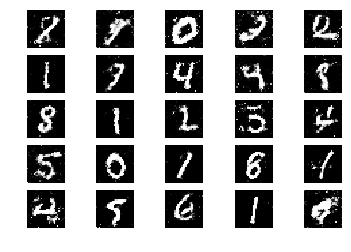

In [7]:
latent_dim = 100

def sample_images():
      r, c = 5, 5
      z = np.random.normal(size=(25, latent_dim))
      gen_imgs = generator.predict(z)

      gen_imgs = 0.5 * gen_imgs + 0.5

      fig, axs = plt.subplots(r, c)
      cnt = 0
      for i in range(r):
          for j in range(c):
              axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
              axs[i,j].axis('off')
              cnt += 1
      plt.show()
      
      
sample_images()